In [1]:
import numpy as np

In [2]:
import pandas as pd

# Генерация искусственного датасета

In [3]:
import sklearn as sk

In [10]:
from sklearn.datasets import make_classification

In [12]:
X, Y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0)

In [14]:
set(Y)

{0, 1}

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

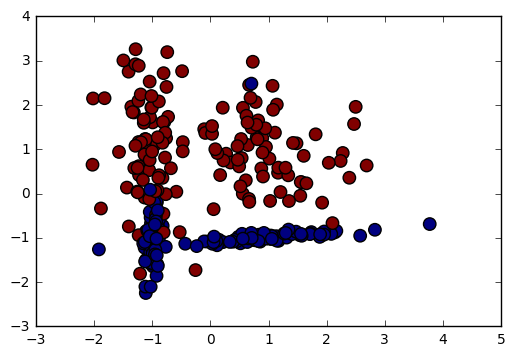

In [21]:
plt.scatter(X[:,0],X[:,1],c=Y,s=80)

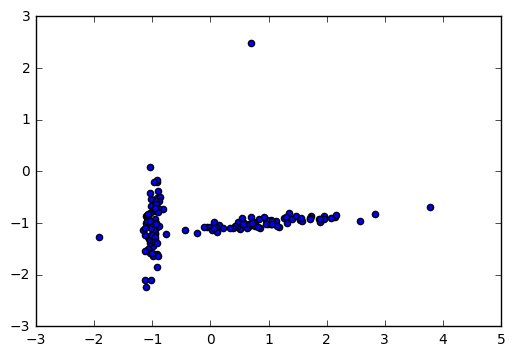

In [23]:
plt.scatter(X[Y==0,0],X[Y==0,1])

In [25]:
def scatter (X,Y,axis0=0,axis1=1):
    plt.scatter(X[:,axis0],X[:,axis1],c=Y,s=80)
    

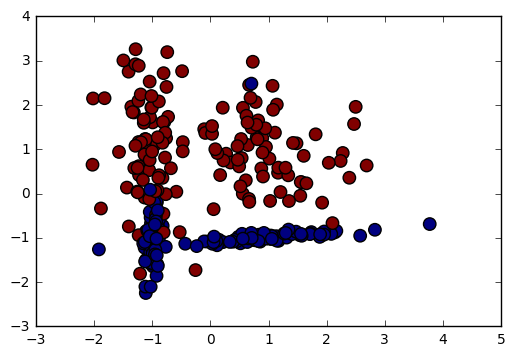

In [26]:
scatter(X,Y)

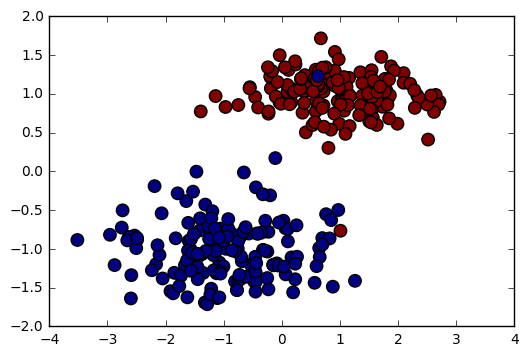

In [27]:
X, Y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,n_clusters_per_class=1)

scatter(X,Y)

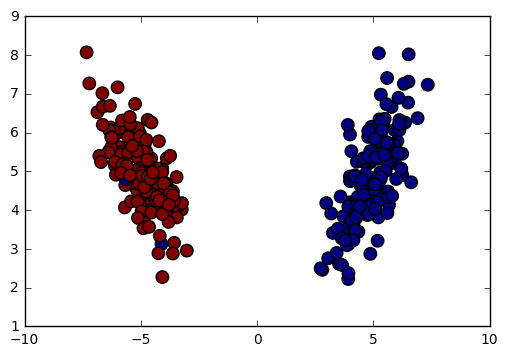

In [28]:
X, Y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,n_clusters_per_class=1,class_sep=5)

scatter(X,Y)

# Scale=масштаб

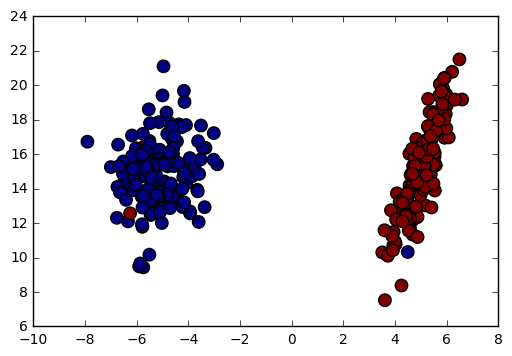

In [32]:
X, Y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,n_clusters_per_class=1,class_sep=5,scale=[3,1])

scatter(X,Y)

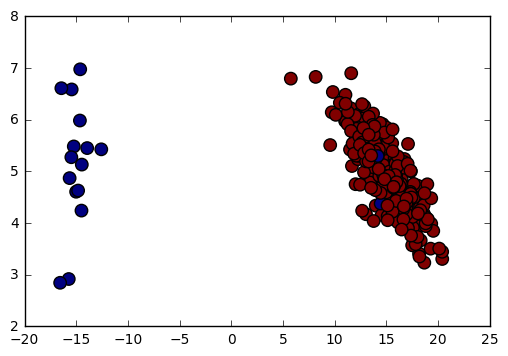

In [34]:
X, Y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,n_clusters_per_class=1,
                           class_sep=5,scale=[3,1], weights=[0.05,0.95])

scatter(X,Y)

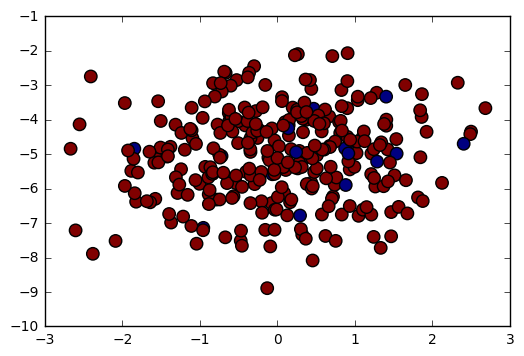

In [38]:
X, Y = make_classification(n_samples=300, n_features=10, n_informative=2, n_redundant=0,n_clusters_per_class=1,
                           class_sep=5, weights=[0.05,0.95])

scatter(X,Y)

# flip_y - выбросы

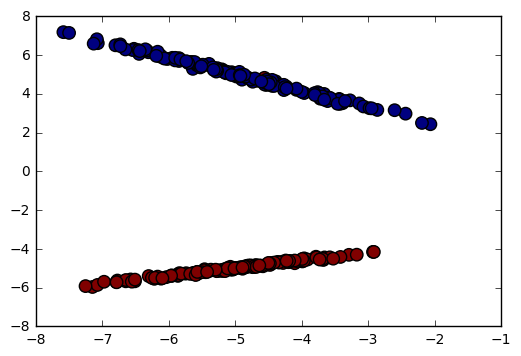

In [45]:
X, Y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,n_clusters_per_class=1,
                           class_sep=5)

scatter(X,Y)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
clf = LogisticRegression()

In [46]:
clf.fit(X[:200],Y[:200])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
y_pred=clf.predict(X[200:])

In [48]:
y_pred

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0])

In [50]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(Y[200:],y_pred)

1.0

In [54]:
(y_pred==Y[200:]).mean()

1.0

In [55]:
clf.coef_


array([[ 0.00310106, -0.93098864]])

In [56]:
clf.intercept_

array([-0.16588753])

In [57]:
from sklearn.grid_search import GridSearchCV


In [64]:
cv = GridSearchCV(LogisticRegression(),param_grid={"C":[1,10,100],"penalty":["l1","l2"]})


In [65]:
cv.fit(X,Y)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [62]:
cv.grid_scores_


[mean: 0.99333, std: 0.00943, params: {'C': 1},
 mean: 0.99333, std: 0.00943, params: {'C': 10},
 mean: 0.99333, std: 0.00943, params: {'C': 100}]